# "Monte Carlo and the power of randomness"

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#First let's load the main scientific and plotting libraries we will need 
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import seaborn as sns
import numpy as np
import scipy as sci

#### Example-1 of using Monte Carlo, estimation of pi

The idea behind the program is that the ratio of the area of the unit circle to the square that inscribes it is $\pi/4$, so by counting the fraction of the random points in the square that are inside the circle, we get increasingly good estimates to $\pi$.

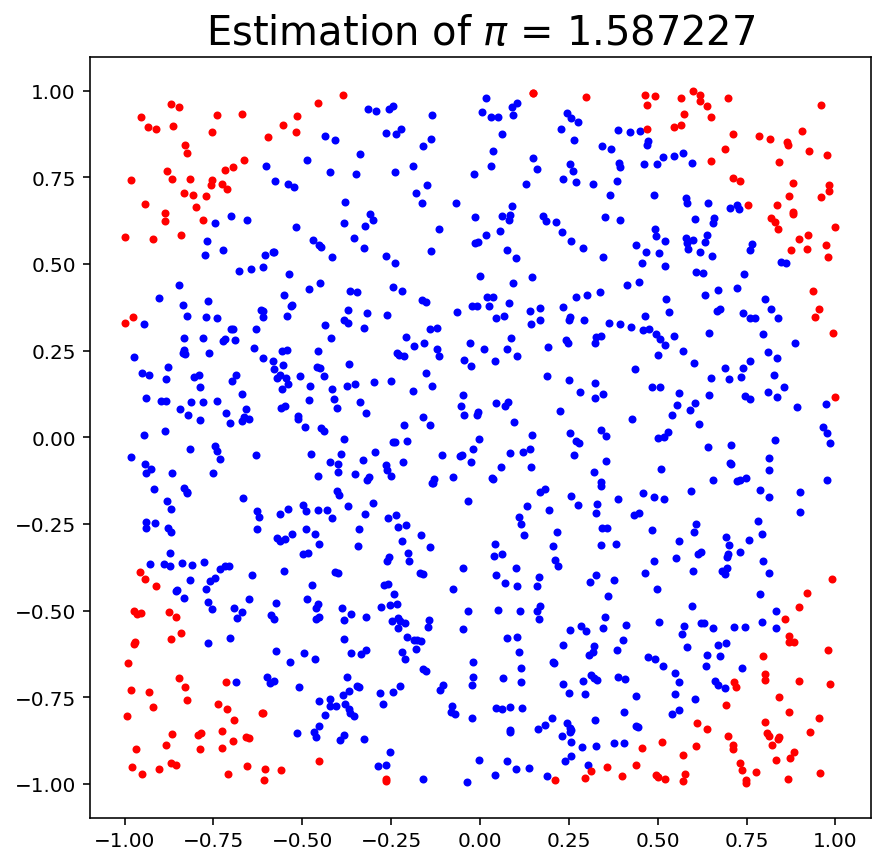

In [2]:
npts = 1000

xs = 2*np.random.rand(npts)-1
ys = 2*np.random.rand(npts)-1

r = xs**2+ys**2

ninside = np.sum(r[r<1]) # sum over those values stasifying r<1

fig,ax=plt.subplots(figsize=(7,7))
ax.set_title("Estimation of $\pi$ = %f" % (4*ninside/float(npts)),fontsize=20)
ax.plot(xs[r<1],ys[r<1],'b.')
ax.plot(xs[r>1],ys[r>1],'r.')

To be fair as methods of computing $\pi$ go, this is not the best method. A much better method is to use Leibniz's expansion of arctan(1):

$$\frac{\pi}{4} = \sum_k \frac{(-1)^k}{2*k+1}$$

In [3]:
kmax = 1000 # 
total = 0
for k in range(kmax):
    total += pow(-1,k)/(2*k+1.0)
print(4*total)

3.140592653839794


#### Basic Idea behind Monte Carlo

The basic idea of Monte Carlo integration is very simple and only requires elementary statistics. Suppose we want to find the value of the following integral in some region with volume $V$: $$I = \int_a^b f(x) dx $$

Monte Carlo integration estimates this integral by estimating the fraction of random points that fall below $f(x)$  multiplied by $V$. In other words we are follwing the same procedure as for evaluating pi but this time our area is the area under some general function instead of a circule inscribed in square. Using probability language, Monte Carlo simulation tallows us to obtain an estimate of the expectation 
$$
E[g(X)] = \int g(x) p(x) dx
$$

with

$$
\bar{g_n} = \frac{1}{n} \sum_{i=1}^n g(x_i)
$$
where points $x_i \sim p$ are draw from the probability density $p$.

We can estimate the Monte Carlo variance of the approximation as $$
\sigma^2_n = \frac{1}{n^2} \sum_{i=1}^n (g(x_i) - \bar{g_n})^2)
$$

Also, according to Central Limit Theorem, expectation of sum of random variables scaled by standard deviaton tends to normal distribution:

$$
\frac{\bar{g_n} - E[g(X)]}{\sigma_n} \sim \mathcal{N}(0, 1)
$$
Therefore the convergence of Monte Carlo integration is $\mathcal{0}(n^{1/2})$ and independent of the dimensionality. Hence Monte Carlo integration generally beats numerical integration for moderate- and high-dimensional integration since numerical integration (quadrature) converges as $\mathcal{0}(n^{d})$. Even for low dimensional problems, Monte Carlo integration may have an advantage when the volume to be integrated is concentrated in a very small region and we can use information from the distribution to draw samples more often in the region of importance.

Okay back to evaluating integrals. We want to have an efficient way of finding integrals like this:

$$I = \int{f(x)} \, dx$$
Consider the expectation of a function $g(x)$ with respect to some distribution $p(x)$. By definition, we have

$$
E[g(x)] = \int{g(x) \, p(x) \, dx}
$$
If we choose $g(x) = f(x)/p(x)$, then we have

$$\begin{align}
E[g(x)] &= \int{\frac{f(x)}{p(x)} \, p(x) \, dx} \\
&= \int{f(x) dx} \\
&= I
\end{align}
$$

By the law of large numbers, the average converges on the expectation, so we have

$$
I \approx \bar{g_n} = \frac{1}{n} \sum_{i=1}^n g(x_i)
$$

Where random points $x_i$ are generated from the distribution $p(x)$. If $f(x)$ is a proper integral (i.e. bounded), and $p(x)$ is the uniform distribution on $[0,1]$, then $g(x) = f(x)$ and this is known as ordinary Monte Carlo. If the integral of $f(x)$ is improper, then we need to use another distribution with the same support as $f(x)$.

 #### Example-2 of using Monte Carlo: evaluation of a definite integral

We want to estimate the following integral $I=\int_0^1 e^x dx$.

Text(0,0.5,'$I$')

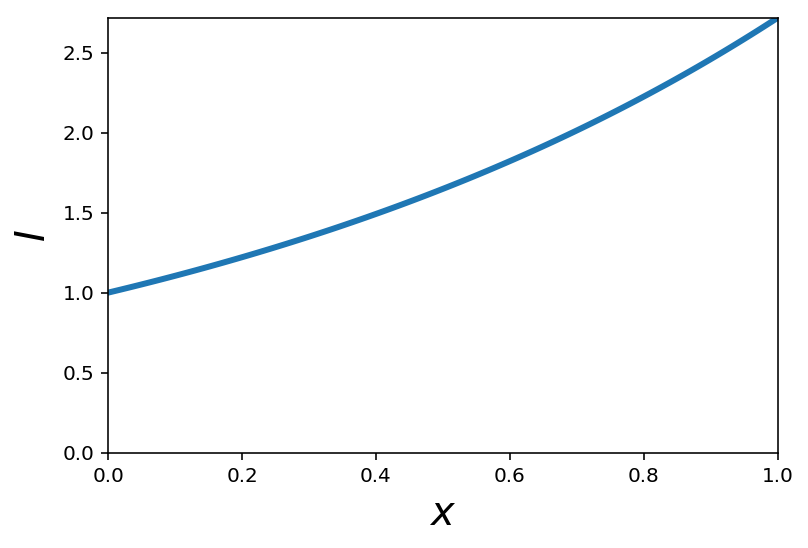

In [4]:
x = np.linspace(0, 1, 100)
plt.plot(x, np.exp(x),linewidth=3.0)
plt.xlim([0,1])
plt.ylim([0, np.exp(1)])
plt.xlabel('$x$',fontsize=20)
plt.ylabel('$I$',fontsize=20)

We can evaluate via quadrature as told in calculus:

In [5]:
from scipy import integrate

y, err = integrate.quad(np.exp, 0, 1)
y,err 

for n in 10**np.array([1,2,3,4,5,6,7,8]):
    x = np.random.uniform(0, 1, n)
    gn = np.mean(np.exp(x))
    print('%10d %.6f' % (n, gn))

        10 1.674384
       100 1.728363
      1000 1.714683
     10000 1.721725
    100000 1.717530
   1000000 1.718556
  10000000 1.718295
 100000000 1.718305


#### Intuition for error rate: Why Monte Carlo can beat brute force integration.
We will just work this out for a proper integral $f(x)$ defined in the unit cube and bounded by $|f(x)| \le 1$. Draw a random uniform vector $x$ in the unit cube. Then

$$
\begin{align}
E[f(x)] &= \int{f(x) p(x) dx} = I \\
\text{Var}[f(x)] &= \int{(f(x) - I )^2 p(x) \, dx} \\
&= \int{f(x)^2 \, p(x) \, dx} - 2I \int f(x) \, p(x) \, dx + I^2 \int{p(x) \, dx} \\
&= \int{f(x)^2 \, p(x) \, dx}  + I^2 \\
& \le \int{f(x)^2 \, p(x) \, dx} \\
& \le \int{p(x) \, dx} = 1
\end{align}
$$
Now consider summing over many such IID (independent identically distributed) points: $S_n = f(x_1) + f(x_2) + ... + f(x_n)$. We have

$$
\begin{align}
E[S_n] &= nI \\
\text{Var}[S_n] & \le n
\end{align}
$$
and as expected, we see that $I \approx S_n/n$. One can proof a Chebyshev's inequality which shows how variance of sum scales with number of samples:

$$
\begin{align}
P \left( \left| \frac{s_n}{n} - I \right| \ge \epsilon \right)  &= 
P \left( \left| s_n - nI \right| \ge n \epsilon \right) & \le \frac{\text{Var}[s_n]}{n^2 \epsilon^2} & \le
\frac{1}{n \epsilon^2} = \delta
\end{align}
$$
Suppose we want 1% accuracy and 99% confidence - i.e. set $\epsilon = \delta = 0.01$. The above inequality tells us that we can achieve this with just $n = 1/(\delta \epsilon^2) = 1,000,000$ samples, regardless of the data dimensionality.

#### Example-3 of using Monte Carlo: monitoring the convergence (decresase of variance)

We are often interested in knowing how many iterations it takes for Monte Carlo integration to "converge". To do this, we would like some estimate of the variance, and it is useful to inspect such plots. One simple way to get confidence intervals for the plot of Monte Carlo estimate against number of iterations is simply to do many such simulations.

For the example, we will try to estimate the function (again)

$$
f(x) = x \cos 71 x + \sin 13x, \ \  0 \le x \le 1
$$

Text(0, 0.5, '$f(x)$')

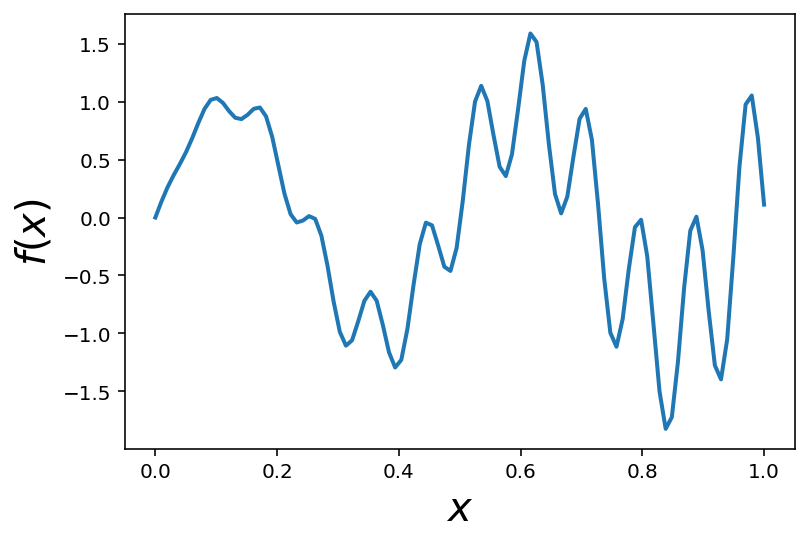

In [3]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)
x = np.linspace(0, 1, 100)
plt.plot(x, f(x),linewidth=2.0)
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$f(x)$',fontsize=20)

When we do a single run of MC we use one long sequence of unform random numbers

In [4]:
# sequence of n uniform random numbers
n = 100 
x = f(np.random.random(n))
y = 1.0/n * np.sum(x)
y

-0.016070670794512926

We vary the sample size from 1 to 100 and calculate the value of $y = \sum{x}/n$ for 1000 replicates. We then plot the 2.5th and 97.5th percentile of the 1000 values of $y$ to see how the variation in $y$ changes with sample size. The blue lines indicate the 2.5th and 97.5th percentiles, and the red line a sample path.

Text(0.5, 0, 'Number of independent MC runs')

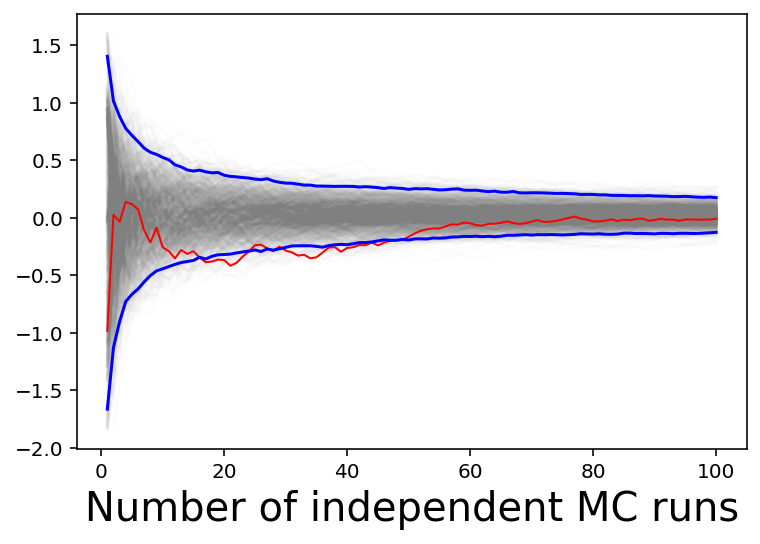

In [5]:
n = 100
reps = 1000

x = f(np.random.random((n, reps)))
y = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)

upper, lower = np.percentile(y, [2.5, 97.5], axis=1)


plt.plot(np.arange(1, n+1), y, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), y[:, 0], c='red', linewidth=1);
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b')
plt.xlabel('Number of independent MC runs',fontsize=20)

#### On variance Reduction
With independent samples, the variance of the Monte Carlo estimate is

$$\begin{align}
\text{Var}[\bar{g_n}] &= \text{Var} \left[ \frac{1}{N}\sum_{i=1}^{N} \frac{f(x_i)}{p(x_i)} \right] \\
&= \frac{1}{N^2} \sum_{i=1}^{N}  \text{Var} \left[ \frac{f(x_i)}{p(x_i)} \right] \\
&= \frac{1}{N^2} \sum_{i=1}^{N} \text{Var}[Y_i] \\
&= \frac{1}{N} \text{Var}[Y_i]
\end{align}$$

where $Y_i = f(x_i)/p(x_i)$. In general, we want to make $\text{Var}[\bar{g_n}]$ as small as possible for the same number of samples. There are several variance reduction techniques (also colorfully known as Monte Carlo swindles) that have been described - we will illustrate one such powerful tecnique called the importance sampling technique.

#### Importance sampling

Suppose we want to evaluate

$$
I = \int{h(x)\,p(x) \, dx}
$$
where $h(x)$ is some function and $p(x)$ is the PDF of $x$. If it is hard to sample directly from $p$, we can introduce a new density function  $q(x)$ that is easy to sample from, and write

$$
I = \int{h(x)\, p(x)\, dx} = \int{h(x)\, \frac{p(x)}{q(x)} \, q(x) \, dx}
$$
In other words, we sample from $h(y)$ where $y \sim q$ and weight it by the likelihood ratio $\frac{p(y)}{q(y)}$, estimating the integral as

$$
I \approx \frac{1}{n}\sum_{i=1}^n \frac{p(y_i)}{q(y_i)} h(y_i)
$$
Sometimes, even if we can sample from $p$ directly, it is more efficient to use another distribution.

Example
Suppose we want to estimate the tail probability of $\mathcal{N}(0, 1)$ for $P(X \gt 5)$. Regular MC integration using samples from $\mathcal{N}(0, 1)$ is hopeless since nearly all samples will be rejected. However, we can use the exponential density truncated at 5 as the importance function and use importance sampling. Note that $h$ here is simply the identify function.


#### Example of importance sampling

Suppose we want to estimate the tail probability of $\mathcal{N}(0, 1)$ for $P(X \gt 5)$. Regular MC integration using samples from $\mathcal{N}(0, 1)$ is hopeless since nearly all samples will be rejected. However, we can use the exponential density truncated at 5 as the importance function and use importance sampling. Note that $h$ here is simply the identify function.


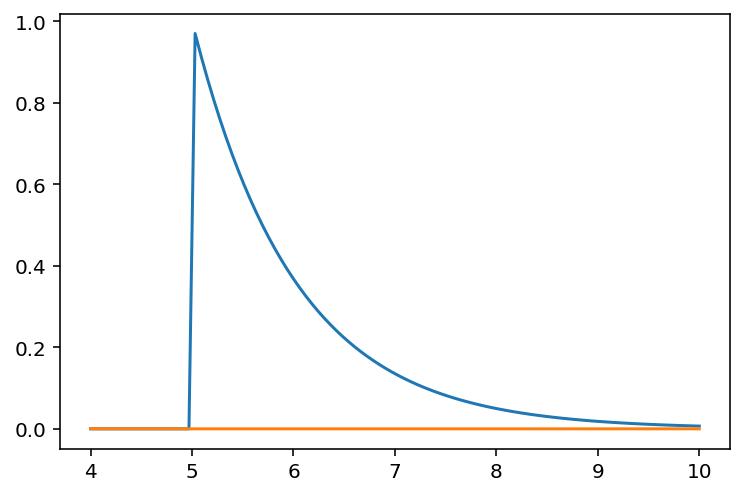

In [7]:
x = np.linspace(4, 10, 100)
plt.plot(x, sp.stats.expon(5).pdf(x))
plt.plot(x, sp.stats.norm().pdf(x))

Expected answer
We expect about 3 draws out of 10,000,000 from $\mathcal{N}(0, 1)$ to have a value greater than 5. Hence simply sampling from $\mathcal{N}(0, 1)$ is hopelessly inefficient for Monte Carlo integration.

In [15]:
v_true = 1 - sci.stats.norm().cdf(5)
v_true

2.866515719235352e-07

In [16]:
# using direct sampling with p(x)=N(0,1)

n = 10000
y = sci.stats.norm().rvs(n)
v_mc = 1.0/n * np.sum(y > 5)
# estimate and relative error
v_mc, np.abs(v_mc - v_true)/v_true

# using importance sampling with p(x)=exp(x)
n = 10000
y = sci.stats.expon(loc=5).rvs(n)
v_is = 1.0/n * np.sum(sci.stats.norm().pdf(y)/sp.stats.expon(loc=5).pdf(y))
# estimate and relative error
v_is, np.abs(v_is- v_true)/v_true

(2.817789610012652e-07, 0.016998375029214027)